# Machine Learning Titanic

In [2]:
import pandas as pd
import os
import numpy as np
import sys

# Define o caminho relativo
file_path = os.path.join('..', 'Data', 'processed_data.csv')  # '..' sobe um nível de diretório

# Carrega os dados
df = pd.read_csv(file_path)
df

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,...,is_male,cabin_group,title,last_name,family_size,fare_group,is_alone,ticket_length,ticket_qtd,sex_pclass_interaction
0,1,0,3,Owen Harris,22.0,1,0,A/5 21171,7.2500,Unk,...,1,Unk,Mr,Braund,2,Low Fare,0,9,1,male_3
1,2,1,1,John Bradley (Florence Briggs Thayer),38.0,1,0,PC 17599,71.2833,C85,...,0,C,Mrs,Cumings,2,High Fare,0,8,1,female_1
2,3,1,3,Laina,26.0,0,0,STON/O2. 3101282,7.9250,Unk,...,0,Unk,Miss,Heikkinen,1,Medium-Low Fare,1,16,1,female_3
3,4,1,1,Jacques Heath (Lily May Peel),35.0,1,0,113803,53.1000,C123,...,0,C,Mrs,Futrelle,2,High Fare,0,6,2,female_1
4,5,0,3,William Henry,35.0,0,0,373450,8.0500,Unk,...,1,Unk,Mr,Allen,1,Medium-Low Fare,1,6,1,male_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Juozas,27.0,0,0,211536,13.0000,Unk,...,1,Unk,Rev,Montvila,1,Medium-Low Fare,1,6,1,male_2
887,888,1,1,Margaret Edith,19.0,0,0,112053,30.0000,B42,...,0,B,Miss,Graham,1,Medium-High Fare,1,6,1,female_1
888,889,0,3,"Catherine Helen ""Carrie""",13.5,1,2,W./C. 6607,23.4500,Unk,...,0,Unk,Miss,Johnston,4,Medium-High Fare,0,10,2,female_3
889,890,1,1,Karl Howell,26.0,0,0,111369,30.0000,C148,...,1,C,Mr,Behr,1,Medium-High Fare,1,6,1,male_1


In [4]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked_c', 'embarked_q', 'embarked_s',
       'age_group', 'is_male', 'cabin_group', 'title', 'last_name',
       'family_size', 'fare_group', 'is_alone', 'ticket_length', 'ticket_qtd',
       'sex_pclass_interaction'],
      dtype='object')

C:\Users\User\AppData\Local\Temp\ipykernel_34264\465485460.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_34264\465485460.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Acurácia do modelo: 0.79
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



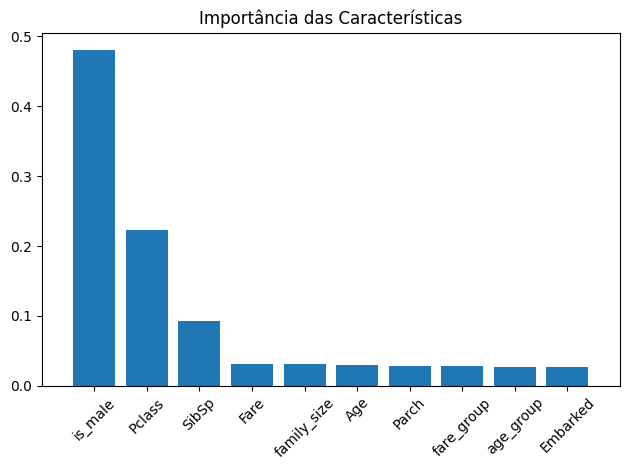

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os
import numpy as np
import sys
# Adiciona o diretório 'Scripts' ao sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..','Scripts')))

# Define o caminho relativo
file_path = os.path.join('..', 'Data', 'train.csv')  # '..' sobe um nível de diretório

# Carrega os dados
df = pd.read_csv(file_path)

# Pré-processamento dos dados
# Criar colunas derivadas
df['age_group'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df['fare_group'] = pd.cut(df['Fare'], bins=[0, 50, 100, 150, 200, 550], labels=['0-50', '51-100', '101-150', '151-200', '201+'])
df['is_male'] = df['Sex'].map({'male': 1, 'female': 0})
df['family_size'] = df['SibSp'] + df['Parch'] + 1

# Preencher valores ausentes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna('S', inplace=True)

# Codificação das variáveis categóricas
label_encoders = {}
for column in ['age_group', 'fare_group', 'Embarked']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Selecionar as características (features) e o alvo (target)
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_male', 'family_size', 'Embarked', 'age_group', 'fare_group']
target = 'Survived'

# Dividir os dados em conjuntos de treino e teste
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir e treinar o modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Gráfico de importância das características
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Criar gráfico de importância
plt.figure()
plt.title("Importância das Características")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()
